<a id="3"></a>
# Tema_03: Sumador completo cuántico

Un sumador completo cuántico demuestra cómo las computadoras cuánticas pueden replicar algoritmos clásicos respetando principios cuánticos como la reversibilidad.

Las computadoras cuánticas pueden implementar lógica clásica al incorporarla dentro de circuitos cuánticos. La diferencia clave es que, mientras que las compuertas clásicas como AND u OR suelen ser irreversibles, las computadoras cuánticas requieren que todas las operaciones sean reversibles. Esto nos obliga a rediseñar la lógica clásica como lógica reversible, la cual puede luego mapearse directamente a compuertas cuánticas.

Al igual que en la electrónica clásica, donde diseñamos [sumadores binarios](https://en.wikipedia.org/wiki/Adder_%28electronics%29) (sumadores parciales, sumadores completos, sumadores con acarreo en cascada, etc.), los circuitos cuánticos también pueden implementar estas operaciones.

Un **sumador completo** clásico toma tres entradas: dos bits a sumar (`A` y `B`) y un bit de acarreo de entrada (`Cin`). Produce dos salidas: el bit de suma (`S`) y el bit de acarreo de salida (`Cout`).

La lógica clásica se describe mediante:

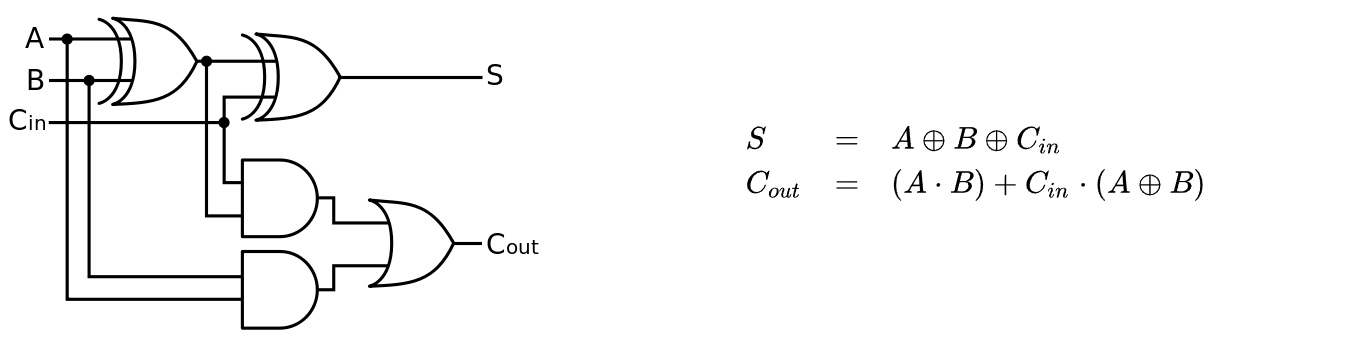

Debido a que los circuitos cuánticos deben ser reversibles (el mismo número de entradas y salidas), diseñamos una versión de 4 qubits donde:

* Entradas: `A`, `B`, `CarryIn` y `aux` (ancilla)
* Salidas: `A`, `B`, `Sum` y `CarryOut`

Esto nos permite implementar lógica clásica de forma reversible utilizando **compuertas CNOT** y **Toffoli (CCX)**.

Una posible implementación en Qiskit se ve así:

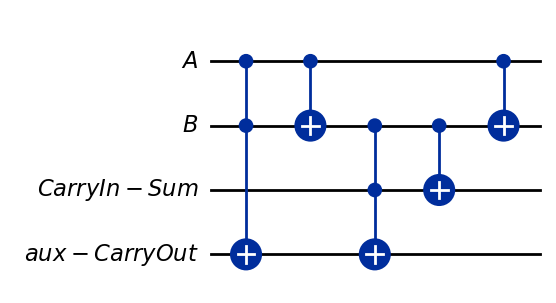

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

A = QuantumRegister(1, 'A')
B = QuantumRegister(1, 'B')
CarryIn = QuantumRegister(1, 'CarryIn-Sum')
cero = QuantumRegister(1, 'aux-CarryOut')
adder = QuantumCircuit(A, B, CarryIn, cero)

adder.ccx(0, 1, 3)
adder.cx(0, 1)
adder.ccx(1, 2, 3)
adder.cx(1, 2)
adder.cx(0, 1)

adder.draw('mpl')

Notemos que este circuito es completamente reversible:

- Todas las compuertas utilizadas son reversibles (CNOT y Toffoli).  
- No se pierde información; todas las entradas pueden recuperarse de las salidas si es necesario.

Esta reversibilidad es esencial para la computación cuántica, ya que la mecánica cuántica no permite que se destruya información durante el cálculo.

### Tabla de verdad

Aquí está la tabla de verdad completa para todas las posibles combinaciones de entrada:


| Estado |  q3 |  q2 |  q1 |  q0 | → |  q3  |  q2 |  q1 |  q0 |
| :---: | :-: | :-: | :-: | :-: | - | :--: | :-: | :-: | :-: |
|       | $\text{aux}$ | $C_{in}$ | $B$ | $A$ | → | $C_{out}$ | $\text{Sum}$ | $B$ | $A$ |
|   E1  |  0  |  0  |  0  |  0  | → |   0  |  0  |  0  |  0  |
|   E2  |  0  |  0  |  0  |  1  | → |   0  |  1  |  0  |  1  |
|   E3  |  0  |  0  |  1  |  0  | → |   0  |  1  |  1  |  0  |
|   E4  |  0  |  0  |  1  |  1  | → |   1  |  0  |  1  |  1  |
|   E5  |  0  |  1  |  0  |  0  | → |   0  |  1  |  0  |  0  |
|   E6  |  0  |  1  |  0  |  1  | → |   1  |  0  |  0  |  1  |
|   E7  |  0  |  1  |  1  |  0  | → |   1  |  0  |  1  |  0  |
|   E8  |  0  |  1  |  1  |  1  | → |   1  |  1  |  1  |  1  |

Ahora podemos inicializar y probar este sumador cuántico completo con entradas específicas.

### Ejemplo 1 — Suma `A=1`, `B=0`, `CarryIn=1`

Preparar el estado inicial:

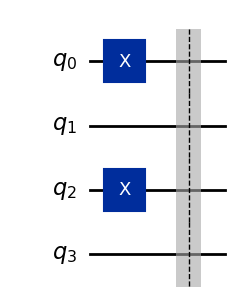

In [15]:
initialization = QuantumCircuit(4)

initialization.x(0)       # A       = 1
initialization.x(2)       # CarryIn = 1
initialization.barrier()

initialization.draw('mpl')

Compongamos con el sumador, midamos y ejecutemos la simulación:

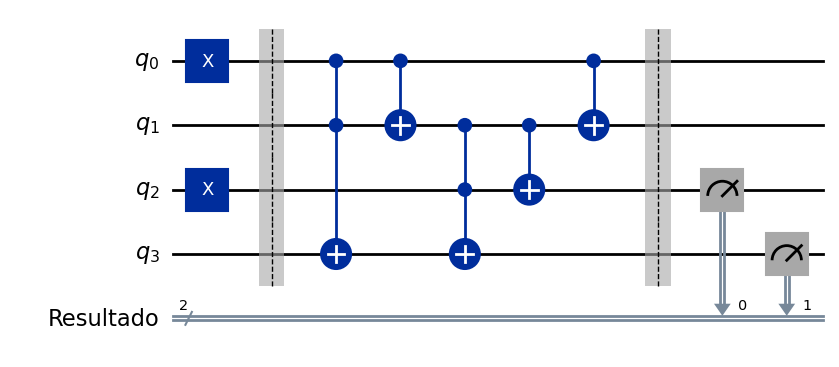

In [18]:
sum = initialization.compose(adder)

sum.barrier()

sum.add_register(ClassicalRegister(2, 'Resultado'))

sum.measure([2, 3], [0, 1])

sum.draw('mpl')

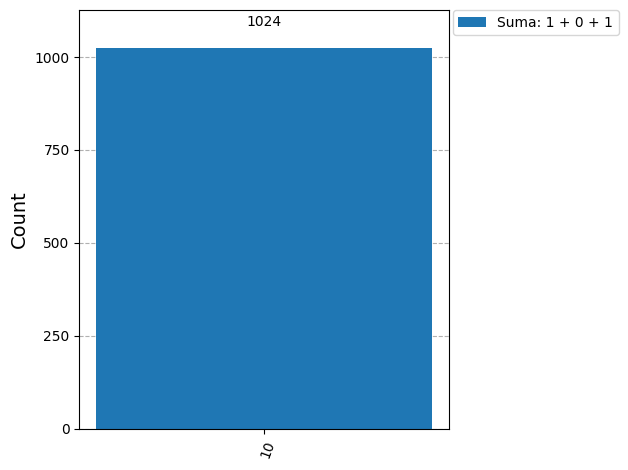

In [19]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

simulator_basic = BasicSimulator()
job_sum = simulator_basic.run(sum)

legend = ["Suma: 1 + 0 + 1"]
plot_histogram([job_sum.result().get_counts()], legend=legend)

### Ejercicio: Suma `A=1`, `B=1`, `CarryIn=1`

### Reflexión

- Este sumador cuántico completo demuestra cómo la lógica clásica se integra en los circuitos cuánticos al rediseñarla en una forma reversible. Las computadoras cuánticas implementan esta lógica clásica reversible mediante compuertas cuánticas, a la vez que obtienen acceso a características únicas de la mecánica cuántica.
- El circuito cuántico es completamente reversible, respetando la naturaleza unitaria de la mecánica cuántica.
- Este ejemplo intuye cómo las operaciones clásicas pueden servir como bloques de construcción para algoritmos cuánticos más avanzados.
<br>